In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import tsregressor

In [2]:
df = pd.read_csv('air_passenger.csv',sep=';')
df['date'] = pd.to_datetime(df['date'],format="%d/%m/%Y")

# noisy inputs
df['exog1'] = df['volume'] + np.random.rand(len(df.index))*100
df['exog2'] = df['volume'] ** .5
df['exog3'] = df['volume'] + np.random.rand(len(df.index))*100

print(df.shape)
df.head(2)

(144, 5)


,date,volume,exog1,exog2,exog3
0,1949-01-01,112,125.465492,10.583005,171.649504
1,1949-02-01,118,180.432693,10.862780,212.115274


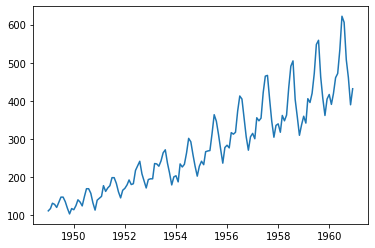

In [3]:
plt.plot(df['date'],df['volume'])

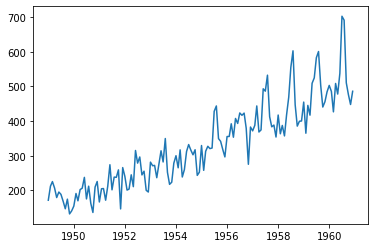

In [4]:
plt.plot(df['date'],df['exog3'])

../tsregressor/models.py:73: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X_new['week_of_year'] = X_new.index.weekofyear


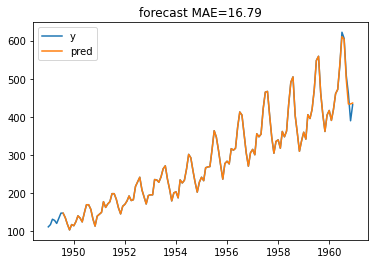

In [74]:
horizon = 7
test_date = pd.date_range(start=df['date'].min(),periods=len(df.index)-horizon+1,freq=df['date'].dt.freq).max()
df_temp = df.loc[df['date']<test_date]

clf = tsregressor.TSRegressor(horizon=horizon,
                              exog=['exog1','exog2','exog3'],
                              target='volume',
                              date=df_temp['date'])
#pred = clf.fit_predict(df,df['volume'])

clf.fit(df_temp,df_temp['volume'])
df_trans = clf.transform(df_temp)
pred = clf.predict(df_trans)

plt.plot(df['date'],df['volume'],label='y')
plt.plot(pred,label='pred')
mae = np.mean(abs(df.loc[df['date']>test_date,'volume'] - pred.loc[pred.index>test_date]))
plt.title('forecast MAE={:0.2f}'.format(mae))
plt.legend()
plt.show()